<a href="https://colab.research.google.com/github/Ruqyai/chatBard/blob/main/Notebooks-Python/Demo_for_PaLM_API_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PaLM API for Chat



**By: Ruqiya Bin Safi**

In [ ]:
# Note: Restaret the notebook after install it
!pip install google-cloud-aiplatform  &> /dev/null

In [ ]:
from google.colab import auth as google_auth
google_auth.authenticate_user()

import vertexai
from vertexai.preview.language_models import ChatModel, InputOutputTextPair

def predict_large_language_model_sample(
    project_id: str,
    model_name: str,
    temperature: float,
    max_output_tokens: int,
    top_p: float,
    top_k: int,
    message: str,
    location: str = "us-central1",
    ) :
    """Predict using a Large Language Model."""
    vertexai.init(project=project_id, location=location)

    chat_model = ChatModel.from_pretrained(model_name)
    parameters = {
      "temperature": temperature,
      "max_output_tokens": max_output_tokens,
      "top_p": top_p,
      "top_k": top_k,
    }

    chat = chat_model.start_chat(
      examples=[]
    )
    response = chat.send_message(message, **parameters)
    
    return response 




In [ ]:
project_id="ai-projects2023"# add your project_id
model_name="chat-bison@001"
temperature= 0.2
max_output_tokens=256
top_p= 0.8
top_k=40
location = "us-central1"

In [ ]:
message="Hello"

In [ ]:
# Test it
predict_large_language_model_sample(project_id, model_name, temperature, max_output_tokens, top_p, top_k ,message ,location)

Hello! How can I help you today?

# How to Build a Demo Chatbot Using Gradio 

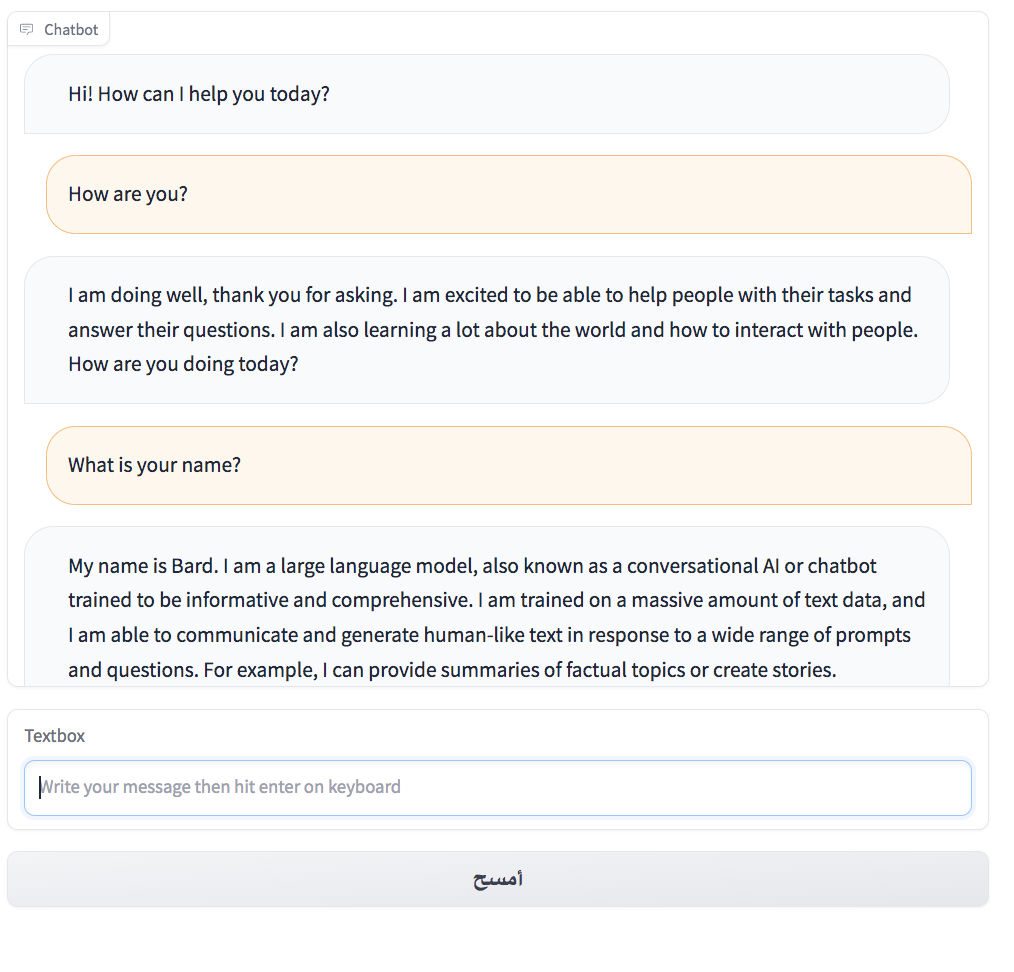

In [ ]:
# Create a funtion that take just the message (prompt)
def chatbot_create(prompt):
    response = predict_large_language_model_sample(project_id, model_name, temperature, max_output_tokens, top_p, top_k ,prompt ,location)
    return response

In [ ]:
! pip install gradio &> /dev/null

In [ ]:
import gradio as gr
import time

with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox(placeholder="Write your message then hit enter on keyboard")
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        bot_message = chatbot_create(message)
        chat_history.append((message, str(bot_message)))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

if __name__ == "__main__":
    demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bf986f1d16771b602a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
